# Levenshtein Distance 
compute and rank Levenshtein distance between ST words and competitor sets from BNC lexicon 
- create BNC frequency lexicon 
- read Study tables
- for each ST word compute competitor set (set of most similr words) in the BNC frequency lexicon
- for each ST word rank competitor set in various ways 
- store rankings foreach word in ST dataframe
- visualize distributions and compute correlations 

In [ ]:
# import kent library
import sys
sys.path.insert(0, '/data/critt/shared/Spring19/')

import kent
import importlib
importlib.reload(kent)

In [ ]:
# Levenshtein distance from https://stackabuse.com/levenshtein-distance-and-text-similarity-in-python/
import numpy as np

def levenshtein(seq1, seq2):  
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
#    print (matrix)
    return (matrix[size_x - 1, size_y - 1])

In [ ]:
x = "This is the fisd string"
y = "This is the second string"
levenshtein(x, y) 

In [78]:
levenshtein("Hi","ello")

4.0

# Task: program a function for spell checker 
 - check wheter word is in BNC freq lexicon (with e.g. freq > 4)
 - otherwise search for set of nearest neighbors
 - return list of most similar words in the BNC

In [ ]:
# retrieve similar words from the BNC
from collections import defaultdict
import numpy as np

def dicSim(word, DIC):
    if (word in DIC): return([])

    r = [] # initialize list of most similar words
    m = len(word) # initialize minimum similarity 
    
    for dic in DIC :
        # ignore entries with low frequencies (perhaps typos)
        if(DIC[dic] < 4) : continue

        # computer the levinsthein distance
        lev = int(levenshtein(dic, word))
        
        # initialize list of most similar words
        if(lev < m) :
            r = [dic]
            m = lev
            
        # add word to list of most similar words
        elif(lev == m) : r.append(dic)
        
    return(r)

In [ ]:
# read BNC word frequency dictionary 
import re

def readFreqDic(dictionary) :
    Dic = {}
    with open(dictionary,"r", encoding="utf8") as file:
        for entry in file:
            tok, num = re.findall("^(.*?)[\s]+(.*?)$", entry)[0]
            Dic[tok] = int(num)
    return (Dic)


In [ ]:
# read BNC frequency dictionary ("Produce a word frequency lexicon from the BNC")
BNC_DIC = readFreqDic('/data/critt/shared/Spring19/lemmaLexicon/BNC.freqLex')

In [63]:
list(BNC_DIC.keys())[:5]

['the', ',', '.', 'of', 'and']

In [ ]:
dic_len = {}
for key in BNC_DIC.keys():
    l = len(key)
    try:
        dic_len[l][key] = BNC_DIC[key]
    except KeyError as er:
        dic_len[l] = {l: BNC_DIC[key]}

In [108]:
json_dic_of_len_words_freq  = json.dumps(dic_len)
f = open('/users/kent/dsahoo/dic_len_words_freq.json','w')
f.write(json_dic_of_len_words_freq)
f.close()

In [ ]:
len(BNC_DIC.keys())

In [ ]:
BNC_DIC['the']

In [88]:
def dicSim2(token, dic_len_freq):
    similar_list = []
    length = len(token)
    
    matched_list = list(dic_len_freq[length].keys())
    if token in matched_list: 
        return similar_list.append(match)
    else: 
        keys = list(dic_len_freq[length].keys())
        for key in keys:
            lev = int(levenshtein(token, str(key)))
            if lev <= 2:
                similar_list.append(key)
    return similar_list     

In [ ]:
dicSim("sunito", BNC_DIC)

In [232]:
# retrieve set of most similar words 

dicSim2("sunito", dic_len)

# Task:
# the function "dicSim" comapres (almost) all words in the BNC:
# try to think of ways to make retrieval faster

['sanity',
 'sunlit',
 'suitor',
 'sunpro',
 'benito',
 'bonito',
 'senato',
 'sancto',
 'susato',
 'subito',
 'suunto',
 'dubito',
 'kunitz',
 'manito',
 'sumito',
 'sunglo',
 'dunite',
 'eunoto',
 'sunium',
 'finito',
 'kuniwo',
 'sumino',
 'subite',
 'pinito',
 'suntop',
 'sanita',
 'puncto',
 'soneto',
 'sinita',
 'sub-to',
 'sunipc',
 'snitow',
 'punity',
 'unitor',
 'sunita',
 'subita',
 'sumiko',
 'susilo',
 'subino',
 'cunico']

---------------------

# Generate and quantify competitor sets of study ST words 
- Read ST tables of PARA19 study into dataFrame
- Produce distance measures for competitor sets 
- visualize histogram, regression analysis

In [ ]:
# read the PARA19 study data
STdf = kent.readTPDDBtables(["PARA19/Tables/"], "*st", path="/data/critt/tprdb/KENT/")

In [ ]:
# All the words in SToken of STdf
source_words = STdf['SToken'].tolist()

In [92]:
def find_levenstine_distance(word,lev_dist):
    word_list = []
    l = len(word)
    d = dic_len[l]
    for w in list(d.keys()):
        lev = levenshtein(word,str(w))
        if lev == lev_dist:
            word_list.append(w)
        
    return word_list

In [ ]:
from tqdm import tqdm

In [ ]:
len(set(source_words))

In [ ]:
#import tqdm
word_to_lev2_dic = {}
for word in tqdm(set(source_words)):
    lev_2 = find_levenstine_distance(word,2)
    word_to_lev2_dic[word] = lev_2

In [99]:
import json
lev1_json = json.dumps(word_to_lev1_dic)

In [111]:
lev4_json = open("/users/kent/dsahoo/stoken_lev3_distance.json","r").read()
lev3_json = json.loads(lev3_json)

In [116]:
word_to_lev3_dic = lev3_json

In [125]:
f = open("/users/kent/dsahoo/stoken_lev5_distance.json","w")
f.write(lev5_json)
f.close()

In [230]:
i = 0
print("Word\t\tLev1\t\tLev2\t\tLev3\t\tLev4\t\tLev5")
for word in source_words:
    if i < 100:
        print(word+"\t\t"+ str(len(word_to_lev1_dic[word]))+"\t\t"+str(len(word_to_lev2_dic[word]))+"\t\t"+str(len(lev3_json[word]))+"\t\t"+str(len(word_to_lev4_dic[word]))+"\t\t"+str(len(word_to_lev5_dic[word])))
        i+=1

Word		Lev1		Lev2		Lev3		Lev4		Lev5
Killer		12		151		532		5007		15303
nurse		5		122		755		10671		47734
receives		4		14		41		484		2702
four		21		376		2087		31089		0
life		24		449		2113		30832		0
sentences		4		4		12		136		878
Hospital		2		1		5		82		799
nurse		5		122		755		10671		47734
Colin		8		164		756		10196		48047
Norris		9		60		217		4540		17733
was		71		1668		7378		0		0
imprisoned		1		0		1		10		72
for		57		1443		7540		0		0
life		24		449		2113		30832		0
today		8		163		786		10895		47377
for		57		1443		7540		0		0
the		68		1447		7653		0		0
killing		14		82		328		2358		4930
of		73		1465		0		0		0
four		21		376		2087		31089		0
of		73		1465		0		0		0
his		70		1612		7390		0		0
patients		1		7		23		478		2982
.		53		0		0		0		0
32		78		1459		0		0		0
year		28		387		2194		30728		0
old		53		1299		7768		0		0
Norris		9		60		217		4540		17733
from		18		325		1902		31053		0
Glasgow		1		3		3		307		2626
killed		16		138		477		4866		15947
the		68		1447		7653		0		0
four		21		376		2087		31089		0
women		16		196		94

## Produce various distance measures for competitor sets 

Compute various measures for each ST word $w$ in competitor set $C_w$:
    (i.e. any word $s$ in the BNC with same length as $w$ differing by a one letter(s))
    
1. size $m$ of competitor set 
2. sum of competitor set similarity scores: $\sum_{s\in C} 1-(lev /len(s))$
3. average similarity: $ 1/m \sum_{s\in C} 1-(lev / len(s)) $        
4. sum of log salience (frequency) of competitor words: $\sum_{s\in C} log(salience(s))$
5. average log salience (frequency) of competitor words: $1/m \sum_{s\in C} log(salience(s))$

     - for competitor set $C_w$ with two, three, .. , n different letters

6. ranked versions of measures 1 ..5 (divide by $lev$)

    - add competitor metrics for each ST word to dataFrame as feature "SimS1", "SimS2", .... "SimSn"


In [ ]:
word_to_lev1_dic
word_to_lev2_dic
word_to_lev3_dic
word_to_lev4_dic
word_to_lev5_dic
frequency_map

In [247]:
word_to_lev1_dic['four']

['your',
 'hour',
 'tour',
 'pour',
 'foul',
 'sour',
 'dour',
 'nour',
 'cour',
 'faur',
 'jour',
 "'our",
 'iour',
 'foun',
 'gour',
 'foux',
 'fous',
 'lour',
 'fout',
 'foir',
 'foor']

In [215]:
s1 = competitor_sim_scores("Norris", word_to_lev1_dic, 1)
s2 = competitor_sim_scores("Norris", word_to_lev1_dic, 2)
s3 = competitor_sim_scores("Norris", word_to_lev1_dic, 3)
s4 = competitor_sim_scores("Norris", word_to_lev1_dic, 4)
s5 = competitor_sim_scores("Norris", word_to_lev1_dic, 5)
print(f"Sim Score for token - Norris is lev1 = {s1:.3f} lev2 = {s2:.3f} lev3 = {s3:.3f} lev4 = {s4:.3f} lev5 = {s5:.3f} ")
print(f"Sim Score for token - Norris is lev1 = {s1/1:.3f} lev2 = {s2/2:.3f} lev3 = {s3/3:.3f} lev4 = {s4/4:.3f} lev5 = {s5/5:.3f} ")

Sim Score for token - Norris is lev1 = 0.833 lev2 = 0.667 lev3 = 0.500 lev4 = 0.333 lev5 = 0.167 
Sim Score for token - Norris is lev1 = 0.833 lev2 = 0.333 lev3 = 0.167 lev4 = 0.083 lev5 = 0.033 


In [173]:
def competitor_sim_scores(token, token_dic, lev):
    similar_list = list()
    try:
        similar_list = token_dic[token]
    except KeyError as ex:
        pass
    similarity_score = 0
    summation = 0
    avg = -1
    list_length = len(similar_list)
    token_length = len(token)
    if similar_list:
        for word in similar_list:
            score = 1 - (lev / token_length)
            summation += score
        if summation:
            avg = summation/list_length
        
    return avg

In [176]:
import math
def salience_score(token, token_dic, lev, frequency_map):
    similar_list = list()
    try:
        similar_list = token_dic[token]
    except KeyError as ex:
        pass
    salience_score = 0
    summation = 0
    avg = -1
    list_length = len(similar_list)
    token_length = len(token)
    word_frequencies = frequency_map[token_length]
    if similar_list:
        for word in similar_list:
            freq = word_frequencies[word]
            summation += math.log(freq)
        avg = summation/list_length
        
    return avg

In [220]:
mydf = STdf

In [207]:
def add_sim_score(df, sim_col_name, lev_dic, lev, add_col=False):
    if add_col:
        df[sim_col_name] = 0.0
        
    for id in list(df.index):
        stoken = mydf.at[id,'SToken'] 
        score = competitor_sim_scores(stoken, lev_dic, lev)
        mydf.at[id, sim_col_name] = float(score)
        
    print(f"The column {sim_col_name} updated successfully")

In [221]:
add_sim_score(mydf, "SimS1", word_to_lev1_dic, 1, True)
add_sim_score(mydf, "SimS2", word_to_lev2_dic, 2, True)
add_sim_score(mydf, "SimS3", word_to_lev3_dic, 3, True)
add_sim_score(mydf, "SimS4", word_to_lev4_dic, 4, True)
add_sim_score(mydf, "SimS5", word_to_lev5_dic, 5, True)

The column SimS1 updated successfully
The column SimS2 updated successfully
The column SimS3 updated successfully
The column SimS4 updated successfully
The column SimS5 updated successfully


In [222]:
mydf.head()

,Id,STseg,Study,Session,SL,TL,Task,Text,Part,SToken,...,CountT,ProbT,HTra,HSeg,HCross,SimS1,SimS2,SimS3,SimS4,SimS5
0,1,1,PARA19,P01_C1,en,en,C,1,P01,Killer,...,6,0.4615,1.8920,1.2389,1.8920,0.833333,0.666667,0.500,0.333333,0.166667
1,2,1,PARA19,P01_C1,en,en,C,1,P01,nurse,...,10,0.7692,0.7793,0.7793,1.8230,0.800000,0.600000,0.400,0.200000,-1.000000
2,3,1,PARA19,P01_C1,en,en,C,1,P01,receives,...,6,0.4615,2.1416,1.1401,1.8230,0.875000,0.750000,0.625,0.500000,0.375000
3,4,1,PARA19,P01_C1,en,en,C,1,P01,four,...,7,0.5385,1.4573,0.7793,1.4885,0.750000,0.500000,0.250,-1.000000,-1.000000
4,5,1,PARA19,P01_C1,en,en,C,1,P01,life,...,9,0.6923,0.8905,0.8905,0.8905,0.750000,0.500000,0.250,-1.000000,-1.000000


In [ ]:
# put here your functions to compute competitor similarity metrics
# and add to STdf dataframe as "SimS1", "SimS2" ...



## Visualize and correlate competitor sets similarities 
- pre-process STdf data
- Empirical cumulative distribution functions 
- Exclude outliers greater or smaller than 2 SD
-

In [223]:
# exclude outliers in dataframe df 
def excludeOutliers(df, col) :
    mean = np.mean(np.array(df[col]), axis=0)
    sd = np.std(np.array(df[col]), axis=0)
    return(df[(df[col] > mean - 2 * sd) & (df[col] < mean + 2 * sd)])

In [224]:
# Empirical cumulative distribution functions 
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

In [236]:
mydf.iloc[:10]

,Id,STseg,Study,Session,SL,TL,Task,Text,Part,SToken,...,CountT,ProbT,HTra,HSeg,HCross,SimS1,SimS2,SimS3,SimS4,SimS5
0,1,1,PARA19,P01_C1,en,en,C,1,P01,Killer,...,6,0.4615,1.8920,1.2389,1.8920,0.833333,0.666667,0.500000,0.333333,0.166667
1,2,1,PARA19,P01_C1,en,en,C,1,P01,nurse,...,10,0.7692,0.7793,0.7793,1.8230,0.800000,0.600000,0.400000,0.200000,-1.000000
2,3,1,PARA19,P01_C1,en,en,C,1,P01,receives,...,6,0.4615,2.1416,1.1401,1.8230,0.875000,0.750000,0.625000,0.500000,0.375000
3,4,1,PARA19,P01_C1,en,en,C,1,P01,four,...,7,0.5385,1.4573,0.7793,1.4885,0.750000,0.500000,0.250000,-1.000000,-1.000000
4,5,1,PARA19,P01_C1,en,en,C,1,P01,life,...,9,0.6923,0.8905,0.8905,0.8905,0.750000,0.500000,0.250000,-1.000000,-1.000000
5,6,1,PARA19,P01_C1,en,en,C,1,P01,sentences,...,9,0.6923,1.1401,1.1401,1.1401,0.888889,0.777778,0.666667,0.555556,0.444444
6,7,2,PARA19,P01_C1,en,en,C,1,P01,Hospital,...,7,0.5385,1.5734,1.2389,2.1920,0.875000,0.750000,0.625000,0.500000,0.375000
7,8,2,PARA19,P01_C1,en,en,C,1,P01,nurse,...,11,0.8462,0.6194,0.6194,2.3535,0.800000,0.600000,0.400000,0.200000,-1.000000
8,9,2,PARA19,P01_C1,en,en,C,1,P01,Colin,...,12,0.9231,0.3912,0.3912,2.4997,0.800000,0.600000,0.400000,0.200000,-1.000000
9,10,2,PARA19,P01_C1,en,en,C,1,P01,Norris,...,11,0.8462,0.7732,0.3912,1.1451,0.833333,0.666667,0.500000,0.333333,0.166667


Perplexity $ PP(s) = 2^{H(s)} $

The higher the perplexity, the more similarly likely choices exist and hence the more
difficult is a decision to make.

In [240]:
mydf[["SimS1", "SimS2", "SimS3", "SimS4", "SimS5", "Ins", "Del","Dur", "TrtS", "TrtT", "HTra", "HCross" ]].corr()

,SimS1,SimS2,SimS3,SimS4,SimS5,Ins,Del,Dur,TrtS,TrtT,HTra,HCross
SimS1,1.000000,0.452731,0.309072,0.164237,0.065061,0.060656,-0.016135,-0.002818,0.098157,0.042744,0.120471,0.120770
SimS2,0.452731,1.000000,0.701828,0.547073,0.434924,0.221080,0.027384,0.098567,0.208212,0.081039,0.175961,0.142551
SimS3,0.309072,0.701828,1.000000,0.783243,0.662009,0.307891,0.056847,0.162457,0.299133,0.109955,0.192913,0.153896
SimS4,0.164237,0.547073,0.783243,1.000000,0.877450,0.353767,0.071816,0.207217,0.371685,0.143641,0.223773,0.171082
SimS5,0.065061,0.434924,0.662009,0.877450,1.000000,0.352742,0.068064,0.206866,0.370751,0.142259,0.239246,0.168056
Ins,0.060656,0.221080,0.307891,0.353767,0.352742,1.000000,0.676864,0.727245,0.202391,0.433558,0.121301,0.115598
Del,-0.016135,0.027384,0.056847,0.071816,0.068064,0.676864,1.000000,0.715516,0.078421,0.407713,0.011522,0.025333
Dur,-0.002818,0.098567,0.162457,0.207217,0.206866,0.727245,0.715516,1.000000,0.192765,0.479111,0.062914,0.068967
TrtS,0.098157,0.208212,0.299133,0.371685,0.370751,0.202391,0.078421,0.192765,1.000000,0.174482,0.107562,0.057689
TrtT,0.042744,0.081039,0.109955,0.143641,0.142259,0.433558,0.407713,0.479111,0.174482,1.000000,0.122153,0.110813


In [266]:
# Pre process data for dependent and independent variables
# - take out outliers (-2< and >2 SD)
# - take out values < 0

# independent variable
indFeat = "SimS1"

# dependent Variable
depFeat = "Dur"


###########
# pre-process data
data = mydf[(mydf.SimS1 > 0)]

# exclude values <= 0 of independent variable
#data = data[(data[indFeat] > 0)]

# exclude outliers of independent variable
#data = excludeOutliers(data, indFeat)

# compute log transformation for independent Variable
indFeatL = indFeat + "Log"
data[indFeatL] = np.log(data[indFeat])

#######
# exclude outliers for dependent variable
#data = data[(data[depFeat] > 0)]
#data = excludeOutliers(data, depFeat)

# compute log transformation for dependent Variable
#depFeatL = depFeat + "Log"
#data[depFeatL] = np.log(data[depFeat])

#######
# take log-transformation of dependent / indpendent variable
#depFeat = depFeatL
indFeat = indFeatL

#######
# compute "STlen" length of SToken
#data["STlen"] = data["SToken"].apply(len)

# show data only for ST words of langth 4
#data = data[(data.STlen == 4) & (data.SimS1 > 0)]

#######
# show correlation matrix
#data = data[(data.STlen == 4)]
#data = data[(data.SimS1 > 0)]

#print(data[["SToken","SimS1"]])
print(data[["SimS1", "SimS2", "SimS3", "SimS4", "SimS5", "Ins", "STlen", "Del","Dur", "TrtS", "TrtT", "HTra", "HCross" ]].corr())


           SimS1     SimS2     SimS3     SimS4     SimS5       Ins     STlen  \
SimS1   1.000000  0.803094  0.866880  0.819868  0.730959  0.318266  0.881352   
SimS2   0.803094  1.000000  0.656750  0.486869  0.375447  0.172330  0.522669   
SimS3   0.866880  0.656750  1.000000  0.760066  0.628813  0.292632  0.743629   
SimS4   0.819868  0.486869  0.760066  1.000000  0.855042  0.334590  0.882223   
SimS5   0.730959  0.375447  0.628813  0.855042  1.000000  0.327091  0.888346   
Ins     0.318266  0.172330  0.292632  0.334590  0.327091  1.000000  0.356059   
STlen   0.881352  0.522669  0.743629  0.882223  0.888346  0.356059  1.000000   
Del     0.064041  0.023419  0.066497  0.077206  0.067973  0.647433  0.069821   
Dur     0.193517  0.083800  0.178161  0.216028  0.208747  0.737086  0.220840   
TrtS    0.322219  0.151817  0.260501  0.328497  0.329936  0.176548  0.357514   
TrtT    0.107145  0.047388  0.088609  0.126993  0.124922  0.397847  0.125482   
HTra    0.145834  0.079804  0.109267  0.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


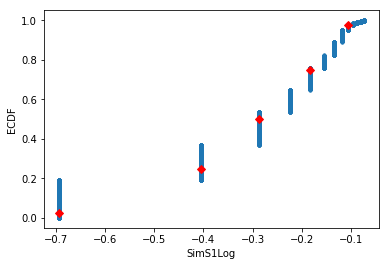

/usr/local/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


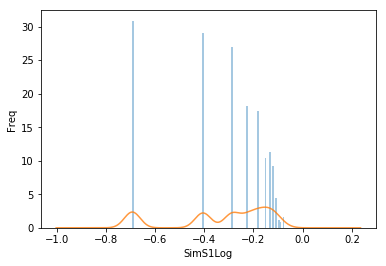

In [267]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

######################
# visualization of independent variable
dataInd = data[indFeat]

## Empirical cumulative distribution functions 
# Compute percentiles: ptiles_vers
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_vers = np.percentile(dataInd, percentiles)

x, y = ecdf(dataInd)

# Generate plot
_ = plt.plot(x, y, marker = '.', linestyle='none')
_ = plt.xlabel(indFeat)
_ = plt.ylabel("ECDF")
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red', linestyle="none")

plt.show()

##### Histogram and density function 

s1 = pd.Series(dataInd)
s1.plot.hist(bins=100,normed=True, alpha=0.4)
s1.plot.density(alpha=0.8)

#s1.plot.density(alpha=0.8)
plt.xlabel(indFeat)
plt.ylabel('Freq')
plt.show()


In [268]:
# Task :
# plot Empirical cumulative distribution for dependent variable
# plot Histogram and density function 

In [274]:
mydf[(mydf.PoS != "IN")][["SToken","PoS"]]

,SToken,PoS
0,Killer,NNP
1,nurse,VBP
2,receives,NNS
3,four,CD
4,life,NN
5,sentences,NNS
6,Hospital,NNP
7,nurse,NN
8,Colin,NNP
9,Norris,NNP


/usr/local/lib64/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


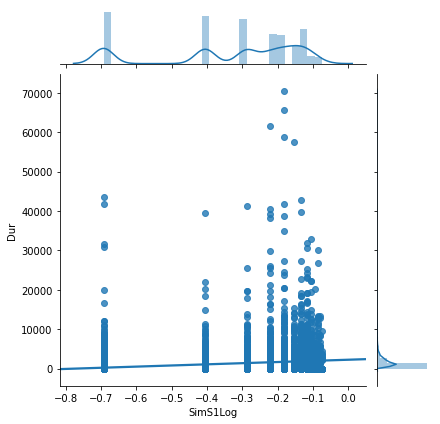

In [269]:
import seaborn as sns

# Regression graph

sns.jointplot(y=depFeat, x=indFeat, data=data, kind="reg");
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    Dur   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     81.74
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           3.30e-84
Time:                        19:32:47   Log-Likelihood:                -85633.
No. Observations:                9048   AIC:                         1.713e+05
Df Residuals:                    9042   BIC:                         1.713e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2378.0825    108

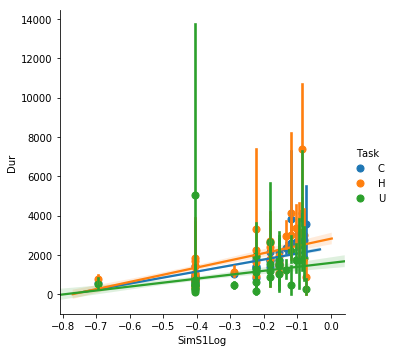

In [270]:
import statsmodels.formula.api as smf
import statsmodels.api as sma

form =depFeat + "~" + indFeat 
form =depFeat + "~" + indFeat + "* Task" 
lmf = smf.ols(formula=form, data=data).fit()

print(lmf.summary())

sns.lmplot(y=depFeat, x=indFeat, hue="Task", x_estimator=np.mean, data=data);

plt.show()


## Produce a word frequency lexicon from the BNC
auxilliary functions no need to repeat this ...
